## Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis

### Problem Statement

### Objective

### Research Question

### Importing Libraries

In [364]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [372]:
df = pd.read_csv('2020_Yellow_Taxi_Trip_Data.csv')
df.head()

VendorID    tpep_pickup_datetime   tpep_dropoff_datetime  passenger_count  \
0       1.0  01/01/2020 12:28:15 AM  01/01/2020 12:33:03 AM              1.0   
1       1.0  01/01/2020 12:35:39 AM  01/01/2020 12:43:04 AM              1.0   
2       1.0  01/01/2020 12:47:41 AM  01/01/2020 12:53:52 AM              1.0   
3       1.0  01/01/2020 12:55:23 AM  01/01/2020 01:00:14 AM              1.0   
4       2.0  01/01/2020 12:01:58 AM  01/01/2020 12:04:16 AM              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            1.2         1.0                  N           238           239   
1            1.2         1.0                  N           239           238   
2            0.6         1.0                  N           238           238   
3            0.8         1.0                  N           238           151   
4            0.0         1.0                  N           193           193   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0           1.0          6.0    3.0      0.5        1.47           0.0   
1           1.0          7.0    3.0      0.5        1.50           0.0   
2           1.0          6.0    3.0      0.5        1.00           0.0   
3           1.0          5.5    0.5      0.5        1.36           0.0   
4           2.0          3.5    0.5      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  
0                    0.3         11.27                   2.5  
1                    0.3         12.30                   2.5  
2                    0.3         10.80                   2.5  
3                    0.3          8.16                   0.0  
4                    0.3          4.80                   0.0

### Exploratory Data Analysis

In [293]:
df.shape

(355174, 18)

In [295]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

##### Features that might affect the fare of the trip.

In [374]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


In [376]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration'] = df['duration'].dt.total_seconds()/60     # dividing by 60 gives the duration in mins
df['duration']

0          4.800000
1          7.416667
2          6.183333
3          4.850000
4          2.300000
            ...    
355169     3.233333
355170     5.483333
355171     5.733333
355172    13.483333
355173     8.500000
Name: duration, Length: 355174, dtype: float64

##### Extracting the necessary data from the dataframe

In [378]:
# Filtered data
df = df[['passenger_count', 'payment_type', 'fare_amount', 'trip_distance', 'duration']]
df

passenger_count  payment_type  fare_amount  trip_distance   duration
0                   1.0           1.0          6.0           1.20   4.800000
1                   1.0           1.0          7.0           1.20   7.416667
2                   1.0           1.0          6.0           0.60   6.183333
3                   1.0           1.0          5.5           0.80   4.850000
4                   1.0           2.0          3.5           0.00   2.300000
...                 ...           ...          ...            ...        ...
355169              2.0           1.0          4.0           0.41   3.233333
355170              2.0           1.0          5.5           0.84   5.483333
355171              0.0           1.0          6.0           0.70   5.733333
355172              0.0           1.0         12.5           3.20  13.483333
355173              0.0           1.0          7.5           1.20   8.500000

[355174 rows x 5 columns]

##### Finding missing values

In [380]:
df.isnull().sum()

passenger_count    660
payment_type       660
fare_amount          0
trip_distance        0
duration             0
dtype: int64

In [382]:
(660/len(df))*100

0.18582441282301068

In [384]:
df.dropna(inplace= True)
df

passenger_count  payment_type  fare_amount  trip_distance   duration
0                   1.0           1.0          6.0           1.20   4.800000
1                   1.0           1.0          7.0           1.20   7.416667
2                   1.0           1.0          6.0           0.60   6.183333
3                   1.0           1.0          5.5           0.80   4.850000
4                   1.0           2.0          3.5           0.00   2.300000
...                 ...           ...          ...            ...        ...
355169              2.0           1.0          4.0           0.41   3.233333
355170              2.0           1.0          5.5           0.84   5.483333
355171              0.0           1.0          6.0           0.70   5.733333
355172              0.0           1.0         12.5           3.20  13.483333
355173              0.0           1.0          7.5           1.20   8.500000

[354514 rows x 5 columns]

In [386]:
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')

##### Checking duplicate values

In [388]:
df[df.duplicated()]

passenger_count  payment_type  fare_amount  trip_distance   duration
2064                  1             2          7.0           0.00   0.000000
2451                  1             1         52.0           0.00   0.200000
2456                  2             1          9.5           1.70  13.066667
2476                  1             1          4.0           0.40   3.083333
3358                  1             1          6.0           1.20   5.350000
...                 ...           ...          ...            ...        ...
355154                1             2          4.0           0.41   3.183333
355159                1             1          4.0           0.40   2.850000
355160                1             1          9.5           1.95  10.983333
355162                1             1          9.0           2.00   9.900000
355165                1             1         10.0           2.10  10.833333

[51694 rows x 5 columns]

##### Dropping duplicate values

In [390]:
df.drop_duplicates(inplace= True)

In [392]:
df.shape

(302820, 5)

##### Checking the contribution of passenger_count and payment_type in the dataset

In [317]:
df['passenger_count'].value_counts(normalize = True) # normalize will give the %, the contribution

passenger_count
1    0.627211
2    0.189882
3    0.059042
5    0.043376
4    0.036025
6    0.026521
0    0.017918
8    0.000017
9    0.000007
7    0.000003
Name: proportion, dtype: float64

In [319]:
df['payment_type'].value_counts(normalize = True)

payment_type
1    0.630708
2    0.358355
3    0.006753
4    0.004184
Name: proportion, dtype: float64

In [394]:
df = df[df['payment_type'] < 3]

In [396]:
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 6) ]

In [325]:
df.shape

(286220, 5)

##### Filtering categorical and numerical data

In [398]:
df['payment_type'].replace([1,2], ['Card', 'Cash'], inplace= True)
df

passenger_count payment_type  fare_amount  trip_distance   duration
0                     1         Card          6.0           1.20   4.800000
1                     1         Card          7.0           1.20   7.416667
2                     1         Card          6.0           0.60   6.183333
3                     1         Card          5.5           0.80   4.850000
4                     1         Cash          3.5           0.00   2.300000
...                 ...          ...          ...            ...        ...
355166                1         Card         12.0           2.10  16.850000
355167                1         Card          8.0           1.73   8.050000
355168                3         Card          8.5           1.76   9.000000
355169                2         Card          4.0           0.41   3.233333
355170                2         Card          5.5           0.84   5.483333

[286220 rows x 5 columns]

In [329]:
df.describe()

passenger_count    fare_amount  trip_distance       duration
count    286220.000000  286220.000000  286220.000000  286220.000000
mean          1.618556      14.809752       3.752733      18.094647
std           1.064887      13.917085       4.557675      78.002258
min           1.000000    -110.000000      -0.880000       0.000000
25%           1.000000       7.000000       1.160000       6.833333
50%           1.000000      10.000000       2.050000      11.316667
75%           2.000000      16.500000       4.100000      17.933333
max           5.000000     491.000000     100.150000    1439.600000

In [402]:
df = df[df['fare_amount'] > 0]
df = df[df['trip_distance'] > 0]
df = df[df['duration'] > 0]

df.describe()

passenger_count    fare_amount  trip_distance       duration
count    283491.000000  283491.000000  283491.000000  283491.000000
mean          1.619674      14.625015       3.785481      18.101593
std           1.065975      13.323338       4.562211      77.810240
min           1.000000       0.010000       0.010000       0.016667
25%           1.000000       7.000000       1.190000       6.916667
50%           1.000000      10.000000       2.080000      11.366667
75%           2.000000      16.500000       4.140000      17.933333
max           5.000000     400.000000     100.150000    1439.600000

##### Checking the outliers to find if we need to remove them.

(array([2.64567e+05, 1.83670e+04, 3.94000e+02, 9.80000e+01, 3.80000e+01,
        7.00000e+00, 8.00000e+00, 5.00000e+00, 4.00000e+00, 3.00000e+00]),
 array([1.00000e-02, 4.00090e+01, 8.00080e+01, 1.20007e+02, 1.60006e+02,
        2.00005e+02, 2.40004e+02, 2.80003e+02, 3.20002e+02, 3.60001e+02,
        4.00000e+02]),
 <BarContainer object of 10 artists>)

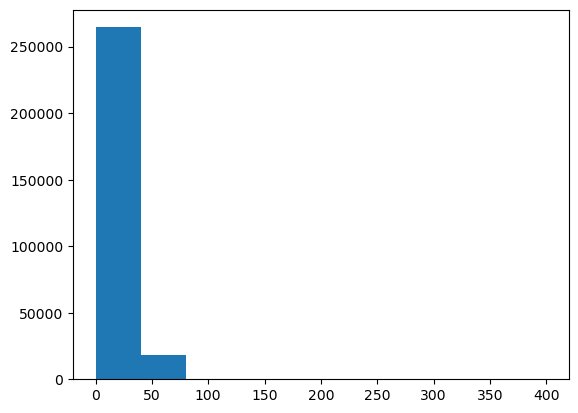

In [333]:
plt.hist(df['fare_amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x20386c77ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x20386c77fe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20386c77860>],
 'medians': [<matplotlib.lines.Line2D at 0x20388249d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x20386cb4350>],
 'means': []}

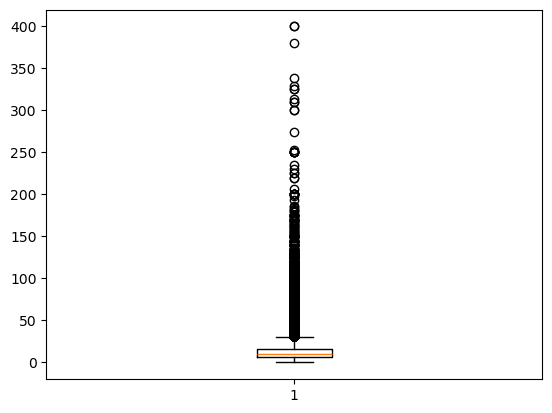

In [335]:
plt.boxplot(df['fare_amount'])

In [404]:
# inter-quantile range

for col in ['fare_amount', 'trip_distance', 'duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1

    lower_bound = q1-1.5 * IQR
    upper_bound = q3+1.5 * IQR

# Filtering the data on basis os lower_bound and upper_bound, the data should be between them.
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [339]:
df

passenger_count payment_type  fare_amount  trip_distance   duration
0                     1         Card          6.0           1.20   4.800000
1                     1         Card          7.0           1.20   7.416667
2                     1         Card          6.0           0.60   6.183333
3                     1         Card          5.5           0.80   4.850000
5                     1         Cash          2.5           0.03   0.883333
...                 ...          ...          ...            ...        ...
355166                1         Card         12.0           2.10  16.850000
355167                1         Card          8.0           1.73   8.050000
355168                3         Card          8.5           1.76   9.000000
355169                2         Card          4.0           0.41   3.233333
355170                2         Card          5.5           0.84   5.483333

[233683 rows x 5 columns]

#### 1. Find if the customer prefer to pay with card or cash on the basis of trip distance and fare_amount. 

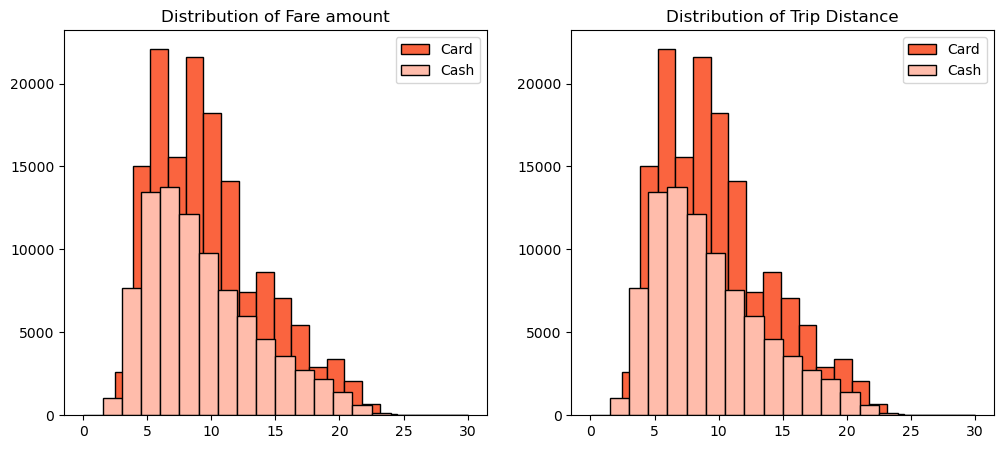

In [342]:
plt.figure(figsize= (12,5))
plt.subplot(1,2,1)
plt.title('Distribution of Fare amount')
plt.hist(df[df['payment_type'] == 'Card']['fare_amount'], histtype= 'barstacked', bins= 20, edgecolor = 'k', color = '#FA643F', label = 'Card')
plt.hist(df[df['payment_type'] == 'Cash']['fare_amount'], histtype= 'barstacked',  bins= 20, edgecolor = 'k', color = '#FFBCAB', label = 'Cash')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of Trip Distance')
plt.hist(df[df['payment_type'] == 'Card']['fare_amount'], histtype= 'barstacked', bins= 20, edgecolor = 'k', color = '#FA643F', label = 'Card')
plt.hist(df[df['payment_type'] == 'Cash']['fare_amount'], histtype= 'barstacked',  bins= 20, edgecolor = 'k', color = '#FFBCAB', label = 'Cash')
plt.legend()
plt.show()

##### Find the mean and standard deviation of fare amount and trip distance

In [406]:
df.groupby('payment_type').agg({'fare_amount':['mean', 'std'], 'trip_distance':['mean', 'std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card            9.844259  4.253694      2.148495  1.374259
Cash            9.561447  4.330578      2.028104  1.415177

##### Find the % of customers who prefers to pay with card and cash.

In [346]:
df['payment_type']

0         Card
1         Card
2         Card
3         Card
5         Cash
          ... 
355166    Card
355167    Card
355168    Card
355169    Card
355170    Card
Name: payment_type, Length: 233683, dtype: object

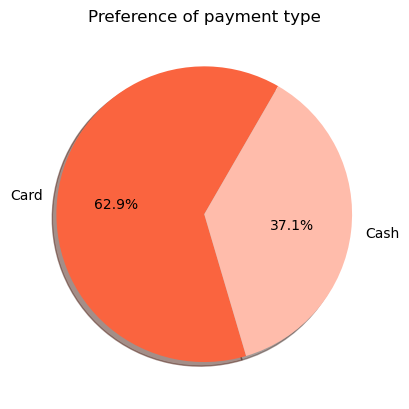

In [348]:

plt.title('Preference of payment type')
plt.pie(df['payment_type'].value_counts(normalize= True), labels= df['payment_type'].value_counts().index,
        startangle = 60, shadow= True, autopct= '%1.1f%%', colors= ['#FA643F', '#FFBCAB'])
plt.show()

##### Analysis of payment type preference on the basis of Passesnger_count

##### Find the distribution of card and cash

In [408]:
passenger_count = df.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()
passenger_count

passenger_count
payment_type passenger_count                 
Card         1                          97087
             2                          29338
             3                           8822
             4                           4577
             5                           7165
Cash         1                          55853
             2                          16961
             3                           5788
             4                           4153
             5                           3939

In [410]:
passenger_count.rename(columns= {'passenger_count': 'count'}, inplace = True)
passenger_count.reset_index(inplace= True)

In [412]:
passenger_count['perc']= (passenger_count['count']/passenger_count['count'].sum())*100
passenger_count

payment_type  passenger_count  count       perc
0         Card                1  97087  41.546454
1         Card                2  29338  12.554615
2         Card                3   8822   3.775200
3         Card                4   4577   1.958636
4         Card                5   7165   3.066119
5         Cash                1  55853  23.901182
6         Cash                2  16961   7.258123
7         Cash                3   5788   2.476860
8         Cash                4   4153   1.777194
9         Cash                5   3939   1.685617

In [414]:
df2 = pd.DataFrame(columns = ['payment_type', 1,2,3,4,5])
df2['payment_type'] = ['card', 'cash']
df2.iloc[0,1:] = passenger_count.iloc[0:5, -1]
df2.iloc[1,1:] = passenger_count.iloc[5:, -1]
df2

payment_type          1          2        3         4         5
0         card  41.546454  12.554615   3.7752  1.958636  3.066119
1         cash  23.901182   7.258123  2.47686  1.777194  1.685617

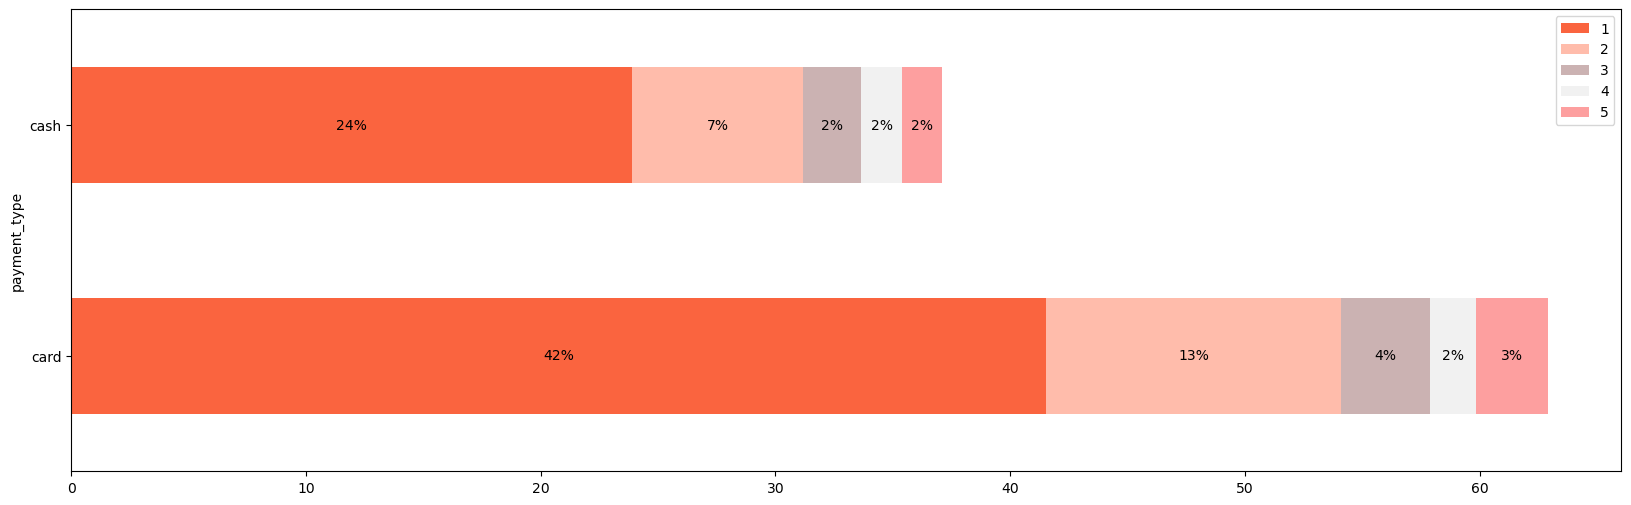

In [416]:
# create the plot
fig, ax = plt.subplots(figsize = (20,6))

# Plot the data
ax = df2.plot(x= 'payment_type', kind = 'barh', stacked= True, color = ['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F'], ax = ax)

# Add percentage text
for p in ax.patches:
    width = p.get_width()     # Get bar width
    height = p.get_height()   # Get bar height
    x, y = p.get_xy()         # Get bottom-left coordinates
    
    ax.text(x + width /2,
            y + height/2,
            '{:.0f}%'.format(width),
            horizontalalignment = 'center',
            verticalalignment = 'center',
            fontsize=10, color='black')

plt.show()

##### The results generated can be proved using Hypothesis testing, that is most of the customers prefer to pay with card than cash. 

### Hypothesis Testing

#### Null hypotesis: There is no differencce in average fare between customers who use credit card and customers who use cash. 

#### Alternate hypothesis: There is a diff in avg fare between customers who use credit card and customers who use cash. 

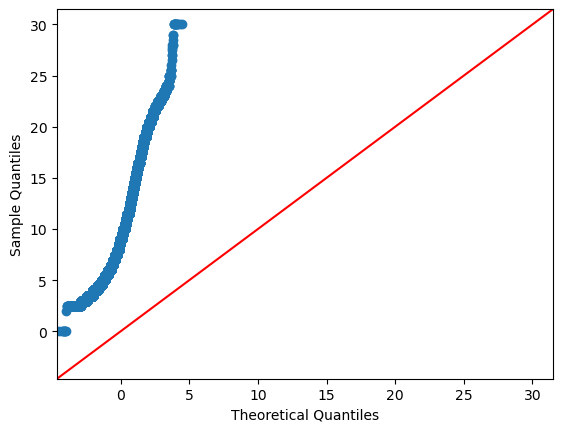

In [418]:
sm.qqplot(df['fare_amount'], line = '45')
plt.show()

In [368]:
print(df.columns)

Index(['payment_type', 1, 2, 3, 4, 5], dtype='object')


In [420]:
# Create the samples
card_sample = df[df['payment_type'] == 'Card']['fare_amount']
cash_sample = df[df['payment_type'] == 'Cash']['fare_amount']

In [422]:
t_stats, p_value = st.ttest_ind(a = card_sample, b= cash_sample, equal_var= False)
print('T-Statistics', t_stats, 'p-Value', p_value)

T-Statistics 15.350700238914365 p-Value 3.788278218118626e-53


In [424]:
3.788278218118626e-53 < 0.05

True

### Thus, we can clonclude that our Alernate Hypothesis is correct that there is a big difference in average fare of customers who pay with      credit card than thte customer who pay with cash.